In [2]:
from ultralytics import YOLO

model = YOLO('yolov8n-seg.pt')  # load an official model

# results = model('https://ultralytics.com/images/bus.jpg')  # a list of results
astro_img='./xmm_om_images_v4-contrast-512-5-7/train/S0044350101_L_png.rf.899408a178cf45369f7ca096e2b66025_augm3.jpg'
results = model(astro_img)  # a list of results


image 1/1 /workspace/raid/OM_DeepLearning/XMM_OM_code_git/xmm_om_images_v4-contrast-512-5-7/train/S0044350101_L_png.rf.899408a178cf45369f7ca096e2b66025_augm3.jpg: 640x640 1 sports ball, 6.6ms
Speed: 6.3ms preprocess, 6.6ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)


In [3]:
results[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair

In [5]:
len(results)

1

In [4]:
len(results[0].masks) # how many masks it detected

1

In [61]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([65/255, 174/255, 255/255, 0.4]) 
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

(512, 512, 3)


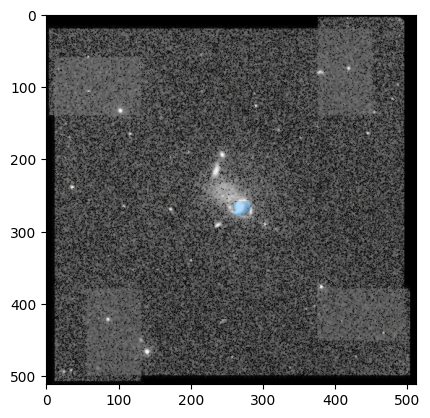

In [62]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import torch.nn.functional as F

np_masks = [mask_torch.data for mask_torch in results[0].masks]

image = cv2.imread(astro_img)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
plt.imshow(image)

for mask in np_masks:
    # yolo masks are downscaled, so we need to rescale them to the original image shape
    upsampled_mask = F.interpolate(mask.unsqueeze(0), size=image.shape[:2], mode='bilinear', align_corners=False).cpu().numpy()

    show_mask(upsampled_mask, plt.gca())
plt.show()
plt.close()

In [42]:
results[0].masks[0]

ultralytics.engine.results.Masks object with attributes:

data: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]], device='cuda:0')
orig_shape: (1080, 810)
shape: torch.Size([1, 640, 480])
xy: [array([[     804.94,       391.5],
       [     794.81,      401.62],
       [     794.81,      403.31],
       [     791.44,      406.69],
       [     791.44,      408.38],
       [     789.75,      410.06],
       [     789.75,      423.56],
       [     788.06,      425.25],
       [     788.06,      430.31],
       [     789.75,         432],
       [     789.75,       445.5],
       [     791.44,      447.19],
       [     791.44,      450.56],
       [     793.12,      452.25],
       [     793.12,      453.94],
       [     794.81,      455.62],
       [     794.81,      465.75],
